# Linear Regression

Despite knowing that Linear Regresion isn't a good fit in the case of predicting the demand of bikesharing rentals hourly, a basic linear regression model is used in order to get some baseline predictions. We fit the model to use mean squared error, mean absolute error, mean absolute percentage error and root mean squared error as a reference to check how good the other models are performing. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

We use the data that we prepared in our feature engineering.

In [2]:
df_bike_trips_hourly = pd.read_parquet('../../data/bike_trips_hourly_FINAL.parquet')
df_bike_trips_hourly.head()

,starting_trips,Most_Occuring_Starting_Neighborhood,min_temp,precip,hour,month,is_weekday,season,is_holiday
index,,,,,,,,,
2016-01-01 00:00:00,26.0,109,6.7,0.0,0,1,1,4,1
2016-01-01 01:00:00,39.0,112,7.2,0.0,1,1,1,4,1
2016-01-01 02:00:00,33.0,87,6.7,0.0,2,1,1,4,1
2016-01-01 03:00:00,6.0,116,6.7,0.0,3,1,1,4,1
2016-01-01 04:00:00,1.0,104,6.1,0.0,4,1,1,4,1


## Define X and Y

We split our data into X and Y as follows: We use 'starting_trips' as our Y value for the prediction. The other features (without starting_trips) are assigned to X. Further we standardize the data of X so the variables are centered and have the mean 0. 

In [3]:
X = df_bike_trips_hourly.drop(['starting_trips'], axis=1)
X_sds = StandardScaler().fit_transform(X)
Y = df_bike_trips_hourly['starting_trips']

## Train the model on the training set

We use a 30/70 split, so that 30% of the data is used for testing and 70% for training the model.

In [4]:
#random_state = 0, so we get the same train and test sets across different executions
#30-70 split 
X_train, X_test, Y_train, Y_test = train_test_split(X_sds, Y, test_size = 0.3, random_state = 0)

In [5]:
regression = LinearRegression().fit(X_train, Y_train)


## Predict the test set results

In [6]:
Y_pred = regression.predict(X_test)
print(Y_pred)

[-11.00237577  84.9843196   13.38297031 ...  47.32129401  50.36589186
 101.59485097]


## Evaluate the model

We print out the values of the chosen evaluation metrics for the linear regression, where it can be seen that the linear regression doesn't perform well, as we expected. 

In [7]:
print(f"MAE: {mean_absolute_error(Y_test, Y_pred):.2f}")
print(f"MSE: {mean_squared_error(Y_test, Y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(Y_test, Y_pred) / Y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(Y_test, Y_pred, squared=False):.2f}")
print(f"R^2: { r2_score(Y_test, Y_pred):.2f}")

MAE: 46.21
MSE: 3846.86
MAPE: 60.69%
RMSE: 62.02
R^2: 0.28


## Plot the results

We wanted to show a visualization of the linear regression. Here we can see how i.e. the outliers are not portrayed well.

Text(0, 0.5, 'Predicted')

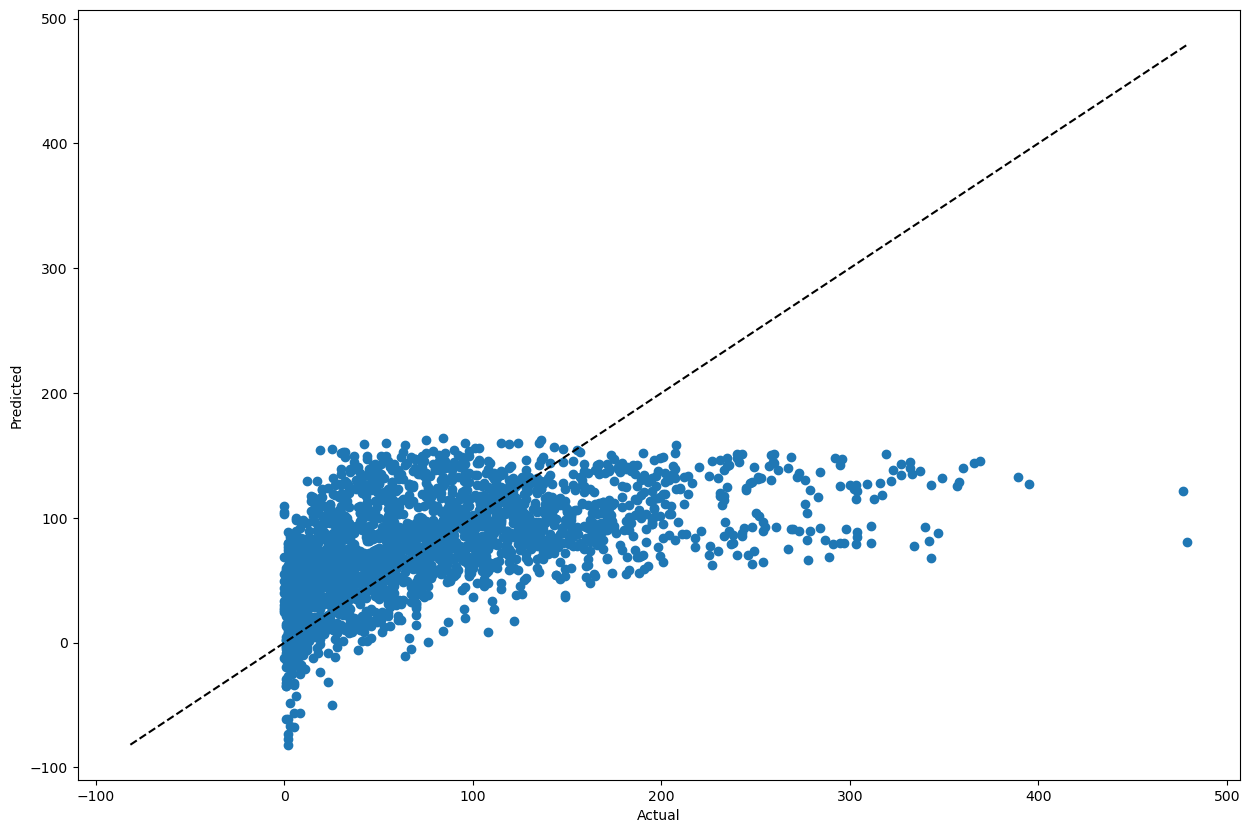

In [8]:
# Create a scatterplot of the actual and predicted values for the test data
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_pred)

#To Do the line as visualization

# Plot the line y=x as a reference
min_val = min(min(Y_test), min(Y_pred))
max_val = max(max(Y_test), max(Y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

plt.xlabel('Actual')
plt.ylabel('Predicted')

# One way to validate the predictions made by your machine learning model is to
# compare the predicted values to the actual values on a plot. This can help you
# visualize how well the model is performing and identify any patterns or trends
# in the data.
#
# For example, if you are using a linear regression model to predict total hourly
# demand for bike rentals, you can create a scatterplot of the actual values and
# the predicted values. If the model is performing well, the points on the
# scatterplot should be close to the line y=x, which indicates a good fit. If the
# points are widely scattered or form a non-linear pattern, this may indicate
# that the model is not performing well and that the predictions may not be
# accurate.
#
# In addition to visualizing the predictions, you can also use error metrics to
# evaluate the performance of your model. For example, you can use mean absolute
# error (MAE) or mean squared error (MSE) to quantify the difference between the
# predicted values and the actual values. These error metrics can help you compare
# the performance of different models and choose the best one for your problem.
#
# It is also a good idea to use a variety of techniques and approaches to validate
# the predictions made by your model. This can help you get a more accurate picture
# of the model's performance and how it might perform on new, unseen data.